In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import PIL 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-22 12:09:23.212451: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 12:09:23.212602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 12:09:23.396975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


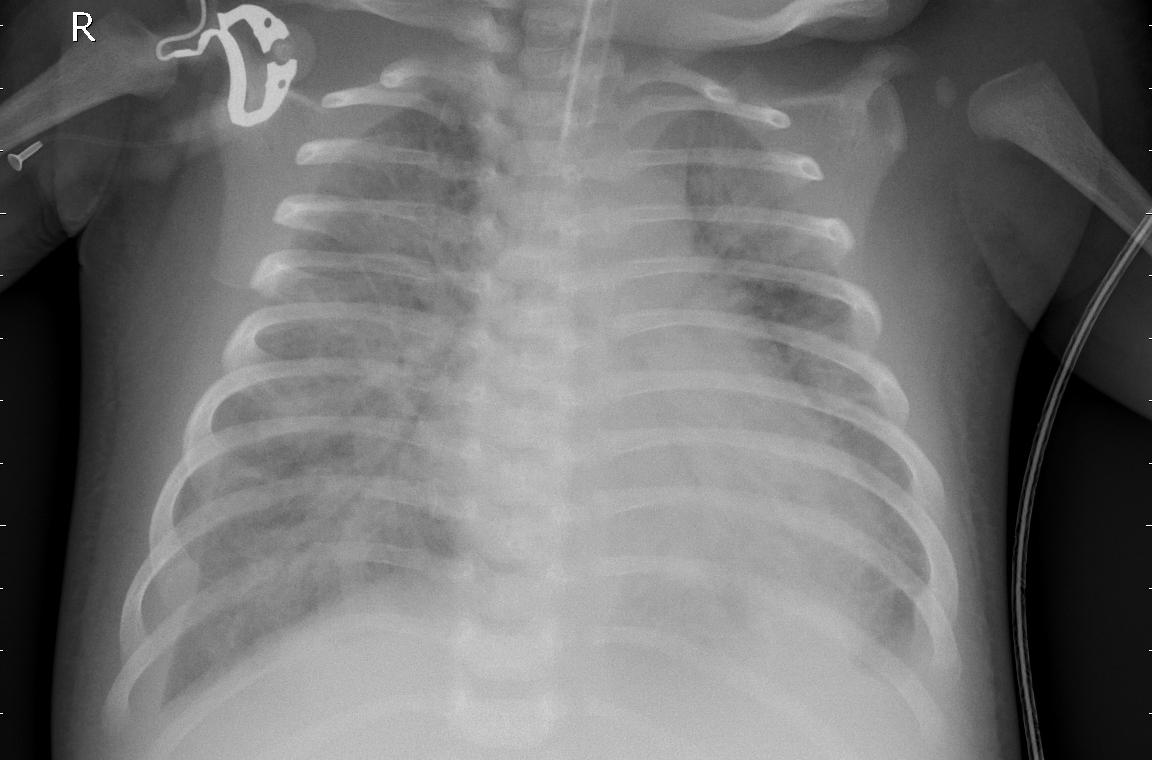

In [3]:
image = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
image

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convolutional Neural Network

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary to check the structure
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,207,873 (4.61 MB)

 Trainable params: 1,207,873 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Define ImageDataGenerators with rescaling
training_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)

# Define data directories
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
validation_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

In [30]:
# Load images and labels from directories
data_train = training_generator.flow_from_directory(
    training_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='binary'
)

data_test = test_generator.flow_from_directory(
    test_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='binary'
)

data_val = validation_generator.flow_from_directory(
    validation_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [31]:
# Train the model using the generators
history = model.fit(
    data_train,
    epochs=3,
    validation_data=data_val,
    steps_per_epoch=data_train.samples // data_train.batch_size,
    validation_steps=data_val.samples // data_val.batch_size
)

Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 634ms/step - accuracy: 0.8048 - loss: 0.4447 - val_accuracy: 0.8750 - val_loss: 0.2801
Epoch 2/3


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2801
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 635ms/step - accuracy: 0.9490 - loss: 0.1243 - val_accuracy: 0.8750 - val_loss: 0.2412


In [32]:
model.evaluate(data_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - accuracy: 0.7815 - loss: 0.6359


[0.5484972596168518, 0.8012820482254028]

In [33]:
predictions = model.predict(data_test)
predictions

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step


array([[0.28260025],
       [0.4999328 ],
       [0.9980557 ],
       [0.99981093],
       [0.3701546 ],
       [0.97356004],
       [0.99940497],
       [0.99988633],
       [0.99929947],
       [0.5376991 ],
       [0.9983418 ],
       [0.9997576 ],
       [0.8934431 ],
       [0.9993822 ],
       [0.9989742 ],
       [0.995224  ],
       [0.02994848],
       [0.99997926],
       [0.99790245],
       [0.99989104],
       [0.08201182],
       [0.99819136],
       [0.97717816],
       [0.99988025],
       [0.99994105],
       [0.05352174],
       [0.99587786],
       [0.9999576 ],
       [0.09278206],
       [0.97918403],
       [0.9722327 ],
       [0.9999662 ],
       [0.99999064],
       [0.99201345],
       [0.9958919 ],
       [0.9999838 ],
       [0.9932313 ],
       [0.05949482],
       [0.99712557],
       [0.99892116],
       [0.8158848 ],
       [0.95386225],
       [0.73508894],
       [0.9963844 ],
       [0.09555415],
       [0.39516944],
       [0.12455218],
       [0.997

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


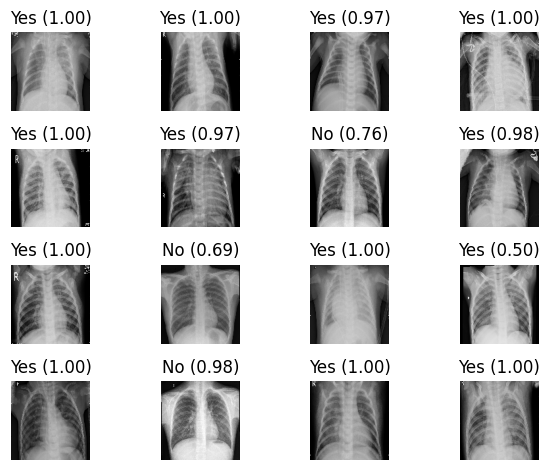

In [39]:
# Get a batch of test data
x, y = next(data_test)

# Make predictions on the test batch
predictions = model.predict(x)

# Plot images and display predictions as "Yes" or "No" along with confidence
for i in range(16):  # Display first 16 images in the batch
    plt.subplot(4, 4, i+1)  # Create 4x4 grid of images
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')  # Hide axes
    
    # Convert prediction to "Yes" or "No"
    if predictions[i][0] > 0.5:
        label = 'Yes'
    else:
        label = 'No'
    
    # Display the result
    confidence = predictions[i][0] if label == 'Yes' else 1 - predictions[i][0]
    plt.title(f'{label} ({confidence:.2f})')

plt.tight_layout()
plt.show()
